1.loading and exploring the dataset.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/concept and technology of AI/apple_quality.csv'
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())          # First few rows
print(df.info())          # Data types and missing values
print(df.describe())      # Summary statistics


   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-nu

2.Data cleaning and pre processing

In [26]:
# Remove rows with missing or invalid entries
df = df.dropna()  # Drop rows with any missing values

# Convert 'Acidity' to numeric if possible, coercing errors to NaN
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Drop rows with NaN in 'Acidity' after conversion
df = df.dropna()

# Verify dataset structure after cleaning
print(df.info())
print(df.head())




<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB
None
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   


2.2 Feature Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
encoder = LabelEncoder()
df['Quality'] = encoder.fit_transform(df['Quality'])

# Save class mappings (e.g., good = 1, bad = 0)
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Class Mappings:", class_mapping)



Class Mappings: {0: 0, 1: 1}


2.3 Split Data for Training and Testing

In [28]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Quality', 'A_id'])  # Exclude ID and target column
y = df['Quality']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3200, 7)
Testing data shape: (800, 7)


# Feature Scaling

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3.1 Logistic Regression




In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Feature Importances:
       Feature  Importance
6     Ripeness    0.156826
1         Size    0.151218
5    Juiciness    0.148000
3    Sweetness    0.143734
7      Acidity    0.126053
2       Weight    0.114600
4  Crunchiness    0.107575
0         A_id    0.051994


In [40]:
# Machine Learning Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7538
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Random Forest Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       401
           1       0.90      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



 Hyperparameter Optimization

In [41]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best Logistic Regression Parameters:", grid_search.best_params_)

param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)


Best Logistic Regression Parameters: {'C': 100}
Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 100}


3.2 Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))


Accuracy: 0.89625
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



Step 4:Feature Importance (for Tree-Based Models)

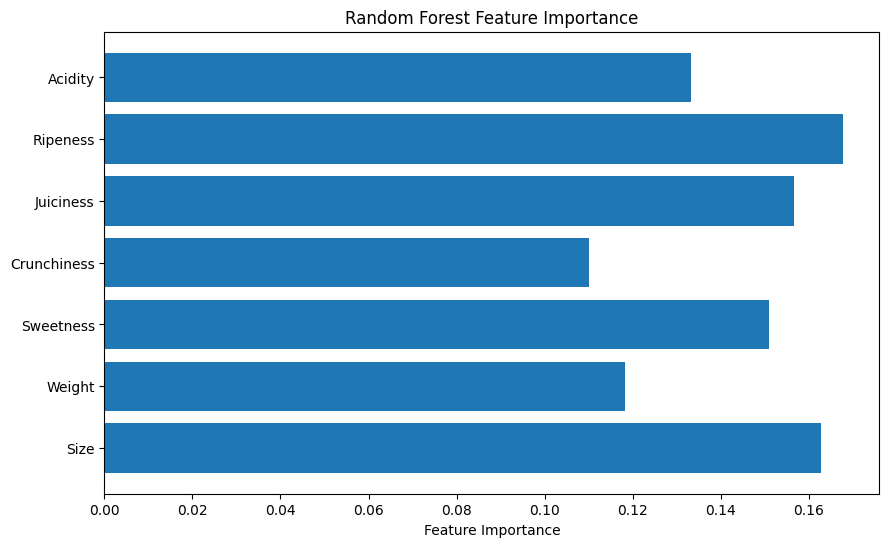

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importance
importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(features)), importance, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


Step 5: Cross-Validation


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Cross-validation scores: [0.89    0.87125 0.89    0.88125 0.88375]
Average CV Score: 0.88325


Step 6: Save the Model

In [32]:

import joblib

# Save the model
joblib.dump(rf_model, "apple_quality_classifier.pkl")


['apple_quality_classifier.pkl']

Step 7: User Interaction for Prediction

In [33]:
import joblib

# Load the trained model
loaded_model = joblib.load("apple_quality_classifier.pkl")

# Example user input: Ensure 7 features are provided in the correct order
user_data = [[1.5, 0.8, 0.6, 1.2, 2.3, -0.4, 0.9]]

# Predict without scaling
prediction = loaded_model.predict(user_data)

# Output the result
result = "Good" if prediction[0] == 1 else "Bad"
print("Predicted Quality:", result)



Predicted Quality: Good


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Generating and Evaluate Report and confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



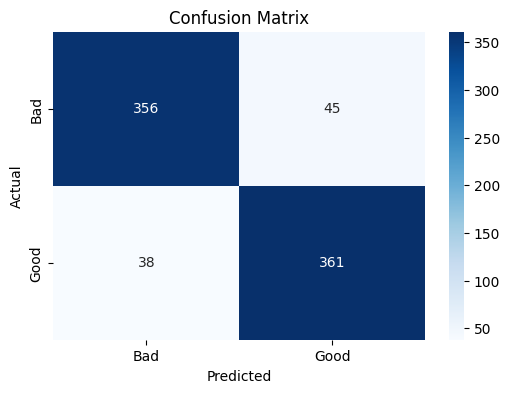

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test and y_test are your testing features and labels
y_pred = loaded_model.predict(X_test)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Improving the Model

In [35]:
import pandas as pd
feature_importance = loaded_model.feature_importances_
features = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print(importance_df)


    Feature  Importance
5  Feature6    0.167724
0  Feature1    0.162871
4  Feature5    0.156634
2  Feature3    0.151104
6  Feature7    0.133286
1  Feature2    0.118328
3  Feature4    0.110052


Saving the Results

In [36]:
import pandas as pd

# Save predictions with actual labels
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv("classification_results.csv", index=False)
